# **ОБЯЗАТЕЛЬНО**

In [83]:
import numpy as np
import math
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

>> ## **Загрузка данных**





In [84]:
#!gdown --id 1etHu1_t0R9xs1rvE9HBSZrRK7en8Hgec

In [85]:
!wget --load-cookies /content/data_for ML.xlsx "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /content/data_for ML.xlsx --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1etHu1_t0R9xs1rvE9HBSZrRK7en8Hgec' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1etHu1_t0R9xs1rvE9HBSZrRK7en8Hgec" -O 'data_for ML.xlsx' && rm -rf /content/data_for ML.xlsx

--2024-03-03 13:35:00--  http://ml.xlsx/
Resolving ml.xlsx (ml.xlsx)... failed: Name or service not known.
wget: unable to resolve host address ‘ml.xlsx’
--2024-03-03 13:35:00--  https://docs.google.com/uc?export=download&confirm=&id=1etHu1_t0R9xs1rvE9HBSZrRK7en8Hgec
Resolving docs.google.com (docs.google.com)... 142.251.111.100, 142.251.111.139, 142.251.111.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.111.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1etHu1_t0R9xs1rvE9HBSZrRK7en8Hgec&export=download [following]
--2024-03-03 13:35:00--  https://drive.usercontent.google.com/download?id=1etHu1_t0R9xs1rvE9HBSZrRK7en8Hgec&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.62.132, 2607:f8b0:4004:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.62.132|:443... connected.
HTTP request sent, awaiting 

In [86]:
df = pd.read_excel('/content/data_for ML.xlsx')

In [87]:
#from google.colab import drive
#drive.mount('/content/drive')

In [88]:
df.head()

,period,psk1,sum1,number1,psk2,sum2,number2,portfolio_previous,portfolio_current
0,2019-03-31,0.0,0.0,0.0,145.285,4165.0,642.0,NaN,4658.0
1,2019-03-31,0.0,0.0,0.0,106.396,8282.0,747.0,NaN,4255.0
2,2019-03-31,0.0,0.0,0.0,149.244,6528.0,905.0,NaN,4618.0
3,2019-03-31,0.0,0.0,0.0,146.000,1850.0,238.0,NaN,779.0
4,2019-03-31,0.0,0.0,0.0,150.689,15122.0,2505.0,NaN,14214.0


In [89]:
df.shape

(35380, 9)

>>## **Работа с nan**

In [90]:
df.isna().sum()

period                   0
psk1                    71
sum1                    71
number1                 71
psk2                    58
sum2                    58
number2                 58
portfolio_previous    6225
portfolio_current        3
dtype: int64

Удаляю строки с пустым portfolio_previous, так как, думаю, что подстановка исказить результаты предсказания

In [91]:
df = df.dropna(subset=['portfolio_previous'])

In [92]:
df.isna().sum()

period                 0
psk1                  52
sum1                  52
number1               52
psk2                  40
sum2                  40
number2               40
portfolio_previous     0
portfolio_current      0
dtype: int64

In [93]:
df.shape

(29155, 9)

In [94]:
df[df['psk1'].isna()].isna().sum()

period                 0
psk1                  52
sum1                  52
number1               52
psk2                  39
sum2                  39
number2               39
portfolio_previous     0
portfolio_current      0
dtype: int64

In [95]:
df[df['psk1'].isna()].describe()

,psk1,sum1,number1,psk2,sum2,number2,portfolio_previous,portfolio_current
count,0.0,0.0,0.0,13.000000,13.000000,13.000000,52.000000,52.000000
mean,NaN,NaN,NaN,130.138692,34612.692308,1506.076923,5130.057692,3999.557692
std,NaN,NaN,NaN,18.874444,115875.416964,3759.984563,22168.515935,24112.721424
min,NaN,NaN,NaN,78.518000,324.000000,68.000000,0.000000,0.000000
25%,NaN,NaN,NaN,120.670000,1073.000000,170.000000,0.000000,0.000000
50%,NaN,NaN,NaN,137.069000,2294.000000,317.000000,495.000000,0.000000
75%,NaN,NaN,NaN,142.371000,3370.000000,726.000000,2052.250000,848.500000
max,NaN,NaN,NaN,143.000000,420187.000000,13917.000000,159651.000000,174227.000000


In [96]:
df[(df['psk1'].isna()) & (df['psk2'].isna()==False)]

,period,psk1,sum1,number1,psk2,sum2,number2,portfolio_previous,portfolio_current
11556,2019-12-31,NaN,NaN,NaN,78.518,700.0,124.0,2724.0,519.0
12628,2020-03-31,NaN,NaN,NaN,136.880,420187.0,13917.0,159651.0,174227.0
13416,2020-03-31,NaN,NaN,NaN,142.715,9608.0,1856.0,4296.0,4328.0
13968,2020-03-31,NaN,NaN,NaN,132.705,3286.0,726.0,2015.0,1599.0
14110,2020-03-31,NaN,NaN,NaN,137.069,3434.0,538.0,1040.0,1172.0
14111,2020-03-31,NaN,NaN,NaN,143.000,3370.0,875.0,1166.0,1170.0
14121,2020-03-31,NaN,NaN,NaN,142.350,1311.0,268.0,1056.0,1157.0
14199,2020-03-31,NaN,NaN,NaN,142.587,2294.0,388.0,975.0,949.0
14252,2020-03-31,NaN,NaN,NaN,142.318,2336.0,317.0,738.0,815.0
14302,2020-03-31,NaN,NaN,NaN,110.060,1339.0,68.0,826.0,711.0


In [97]:
cols_to_fill = ['psk1', 'sum1', 'number1']
mask = (df['psk1'].isna()) & (df['psk2'].isna()==False)
df.loc[mask, cols_to_fill] = df.loc[mask, cols_to_fill].fillna(0)

In [98]:
df[df['psk1'].isna()].isna().sum()

period                 0
psk1                  39
sum1                  39
number1               39
psk2                  39
sum2                  39
number2               39
portfolio_previous     0
portfolio_current      0
dtype: int64

In [99]:
# =============================
# остальное пока просто удаляем
# =============================

df = df.dropna(subset=['psk1'])
df = df.dropna(subset=['psk2'])

In [100]:
df.isna().sum()

period                0
psk1                  0
sum1                  0
number1               0
psk2                  0
sum2                  0
number2               0
portfolio_previous    0
portfolio_current     0
dtype: int64

>>## **Преобразовать дату в числа**

In [101]:
df['quarter'] = df['period'].apply(lambda x: (x.month - 1) // 3 + 1)

In [102]:
df['yaear'] = df['period'].apply(lambda x: x.year)

In [103]:
df = df.drop('period', axis=1)

In [104]:
df.head()

,psk1,sum1,number1,psk2,sum2,number2,portfolio_previous,portfolio_current,quarter,yaear
3340,0.0,0.0,0.0,144.704,4400.0,672.0,4658.0,5362.0,2,2019
3341,0.0,0.0,0.0,109.439,8007.0,783.0,4255.0,4332.0,2,2019
3342,0.0,0.0,0.0,133.716,6070.0,802.0,4618.0,4500.0,2,2019
3343,0.0,0.0,0.0,146.000,2029.0,224.0,779.0,780.0,2,2019
3344,0.0,0.0,0.0,149.459,14933.0,2505.0,14214.0,15781.0,2,2019


>>## **Описание**

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29115 entries, 3340 to 33303
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   psk1                29115 non-null  float64
 1   sum1                29115 non-null  float64
 2   number1             29115 non-null  float64
 3   psk2                29115 non-null  float64
 4   sum2                29115 non-null  float64
 5   number2             29115 non-null  float64
 6   portfolio_previous  29115 non-null  float64
 7   portfolio_current   29115 non-null  float64
 8   quarter             29115 non-null  int64  
 9   yaear               29115 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 2.4 MB


In [106]:
df.describe()

,psk1,sum1,number1,psk2,sum2,number2,portfolio_previous,portfolio_current,quarter,yaear
count,29115.000000,29115.000000,29115.000000,29115.000000,2.911500e+04,29115.000000,2.911500e+04,2.911500e+04,29115.000000,29115.000000
mean,3.153531,517.744874,1.456534,94.529746,1.907963e+04,1871.779598,1.882985e+04,1.930999e+04,2.600378,2020.013017
std,15.256330,7875.470947,18.302012,56.476821,1.346327e+05,12133.084537,1.608989e+05,1.635474e+05,1.059010,0.793298
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000,2019.000000
25%,0.000000,0.000000,0.000000,74.118000,2.200000e+02,31.000000,3.040000e+02,2.980000e+02,2.000000,2019.000000
50%,0.000000,0.000000,0.000000,116.175000,2.242000e+03,297.000000,1.822000e+03,1.827000e+03,3.000000,2020.000000
75%,0.000000,0.000000,0.000000,131.402500,8.208500e+03,1014.000000,6.474000e+03,6.628000e+03,4.000000,2021.000000
max,518.923000,526008.000000,2002.000000,1420.669000,5.418781e+06,634980.000000,1.453838e+07,1.453838e+07,4.000000,2021.000000


# **НЕОБЯЗАТЕЛЬНО**

>>## **Удаление ПСК**

In [ ]:
df = df.drop(['psk1', 'psk2'], axis=1)
df.columns

Index(['sum1', 'number1', 'sum2', 'number2', 'portfolio_previous',
       'portfolio_current', 'quarter', 'yaear'],
      dtype='object')

>>## **Удаление выбросов без логарифма (мягко, визуально)**

In [69]:
df.shape

(29115, 10)

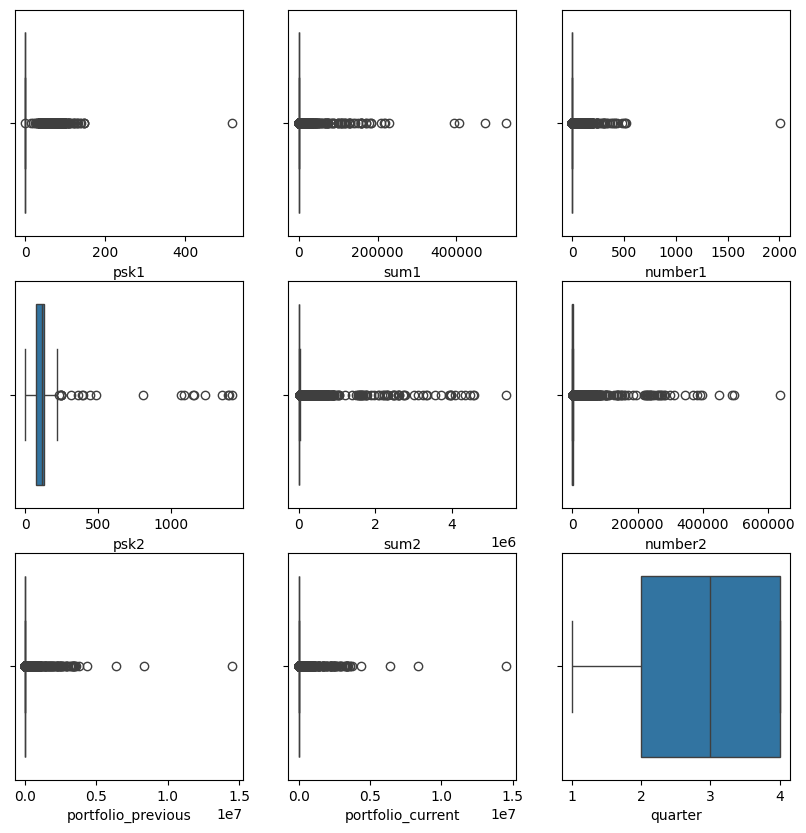

In [70]:
columns = df.columns.tolist()
columns.pop()
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, column in enumerate(columns):
    sns.boxplot(x=df[column], ax=axes[i//3][i%3])
    #sns.boxplot(x=df[df[column]!=0][column], ax=axes[i//3][i%3])

In [71]:
mask = (df['psk1']>300)
df = df.drop(df[mask].index)

In [72]:
mask = (df['sum1']>300000)
df = df.drop(df[mask].index)

In [73]:
mask = (df['number1']>1000)
df = df.drop(df[mask].index)

In [74]:
mask = (df['psk2']>600)
df = df.drop(df[mask].index)

In [75]:
mask = (df['sum2']>5e6)
df = df.drop(df[mask].index)

In [76]:
mask = (df['number2']>6e5)
df = df.drop(df[mask].index)

In [77]:
mask = (df['portfolio_previous']>4e6)
df = df.drop(df[mask].index)

In [78]:
mask = (df['portfolio_current']>4e6)
df = df.drop(df[mask].index)

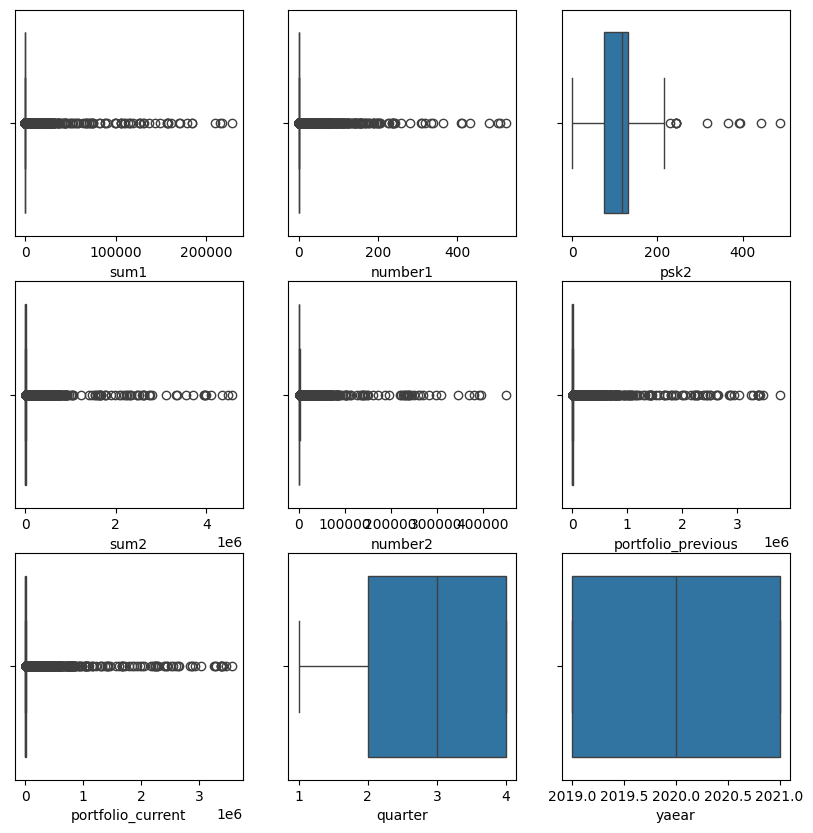

In [79]:
columns = df.columns.tolist()
columns.pop(0)
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, column in enumerate(columns):
    sns.boxplot(x=df[column], ax=axes[i//3][i%3])

>>## **Удаление выбросов без логарифма (жестко, score падает до 61)**

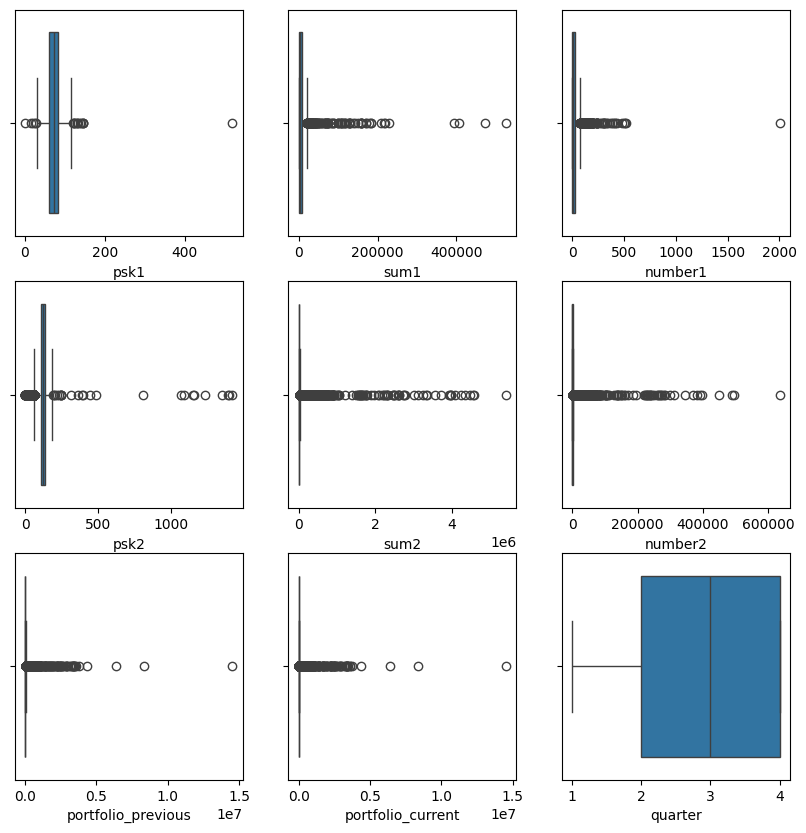

In [107]:
columns = df.columns.tolist()
columns.pop()
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, column in enumerate(columns):
    #sns.boxplot(x=df[column], ax=axes[i//3][i%3])
    sns.boxplot(x=df[df[column]!=0][column], ax=axes[i//3][i%3])

In [108]:
columns = df.columns.tolist()
for column in columns:
    df_tmp = pd.DataFrame(df[df[column]>0][column])
    Q1 = np.quantile(df_tmp[column],0.25)
    Q3 = np.quantile(df_tmp[column],0.75)
    IQR = Q3 - Q1

    LowerWhisker = Q1 - 1.5*IQR
    UpperWhisker = Q3 + 1.5*IQR
    filter_condition = (df[column] != 0) & (
                (df[column] < LowerWhisker) |
                (df[column] > UpperWhisker))
    df.loc[filter_condition, column] = np.nan
print(df.isna().sum())
print(df.shape)

psk1                    18
sum1                   140
number1                139
psk2                   474
sum2                  3021
number2               2766
portfolio_previous    3195
portfolio_current     3191
quarter                  0
yaear                    0
dtype: int64
(29115, 10)


In [109]:
df = df.dropna(subset=columns)
print(df.isna().sum())
print(df.shape)

psk1                  0
sum1                  0
number1               0
psk2                  0
sum2                  0
number2               0
portfolio_previous    0
portfolio_current     0
quarter               0
yaear                 0
dtype: int64
(24151, 10)


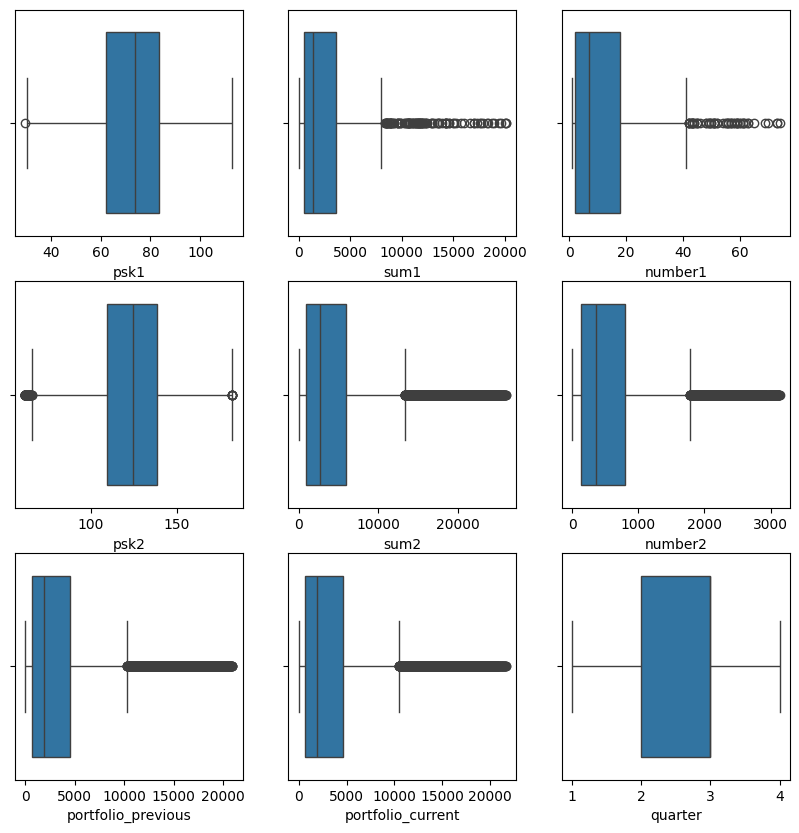

In [110]:
columns = df.columns.tolist()
columns.pop()
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, column in enumerate(columns):
    #sns.boxplot(x=df[column], ax=axes[i//3][i%3])
    sns.boxplot(x=df[df[column]!=0][column], ax=axes[i//3][i%3])

>>## **В логарифм**

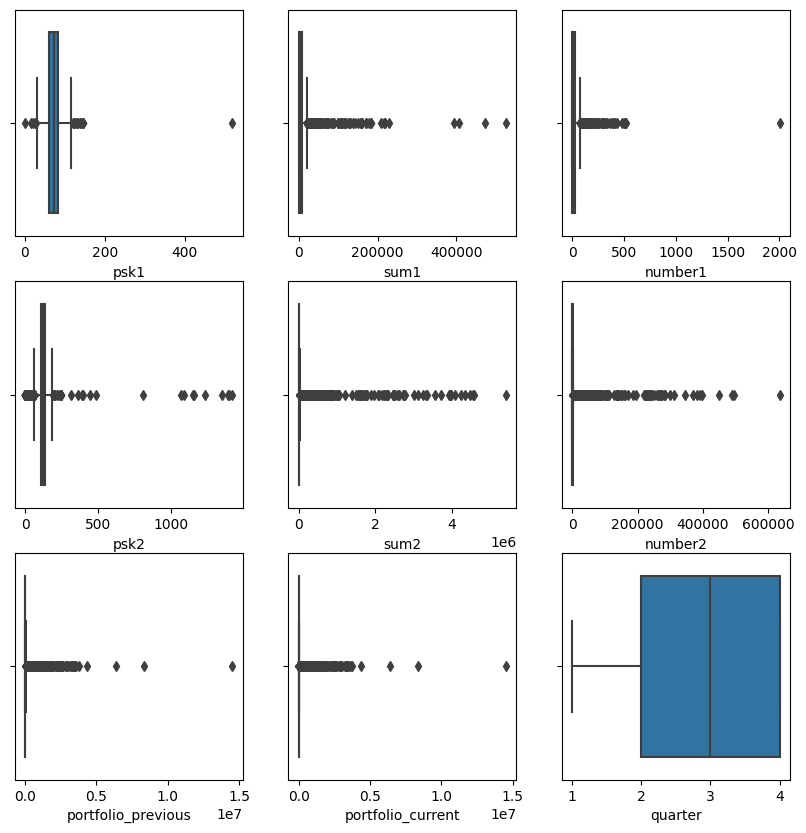

In [ ]:
columns = df.columns.tolist()
columns.pop(9)
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, column in enumerate(columns):
  sns.boxplot(x=df[df[column]!=0][column], ax=axes[i//3][i%3])

In [ ]:
'''
columns = df.columns.tolist()
columns.pop(9)
columns.pop(8)
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, column in enumerate(columns):
  print(f'i={i}  column={column}')
  sns.histplot(df[df[column]!=0][column], kde=True, ax=axes[i//3][i%3])
'''

"\ncolumns = df.columns.tolist()\ncolumns.pop(9)\ncolumns.pop(8)\nfig, axes = plt.subplots(3, 3, figsize=(10, 10))\nfor i, column in enumerate(columns):\n  print(f'i={i}  column={column}')\n  sns.histplot(df[df[column]!=0][column], kde=True, ax=axes[i//3][i%3])\n"

In [ ]:
def get_log(x):
    return math.log(x) if x else 0

In [ ]:
columns = ['sum1','number1','sum2','number2','portfolio_previous','portfolio_current']
for column in columns:
  df[column] = df.apply(lambda x: get_log(x[column]), axis=1)

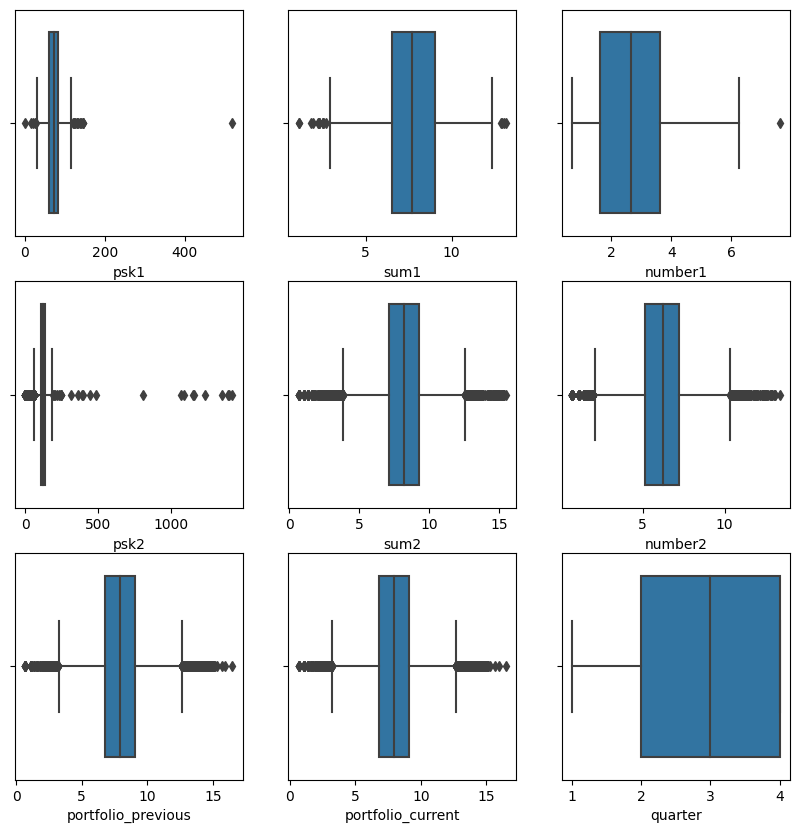

In [ ]:
columns = df.columns.tolist()
columns.pop(9)
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, column in enumerate(columns):
  sns.boxplot(x=df[df[column]!=0][column], ax=axes[i//3][i%3])

>>## **Удаление выбросов c логарифмом**

In [ ]:
# ==============================
# Сначала удаляем выбросы по ПСК
# ==============================
mask = (df['psk1']>300)
df = df.drop(df[mask].index)
mask = (df['psk2']>300)
df = df.drop(df[mask].index)

In [ ]:
columns = ['sum1','number1','sum2','number2','portfolio_previous','portfolio_current']
for column in columns:
    df_tmp = pd.DataFrame(df[df[column]>0][column])
    Q1 = np.quantile(df_tmp[column],0.25)
    Q3 = np.quantile(df_tmp[column],0.75)
    IQR = Q3 - Q1

    LowerWhisker = Q1 - 1.5*IQR
    UpperWhisker = Q3 + 1.5*IQR
    filter_condition = (df[column] != 0) & (
                (df[column] < LowerWhisker) |
                (df[column] > UpperWhisker))
    df.loc[filter_condition, column] = np.nan
print(df.isna().sum())
print(df.shape)

psk1                    0
sum1                   18
number1                 1
psk2                    0
sum2                  532
number2               452
portfolio_previous    439
portfolio_current     446
quarter                 0
yaear                   0
dtype: int64
(29098, 10)


In [ ]:
df = df.dropna(subset=columns)
print(df.isna().sum())
print(df.shape)

psk1                  0
sum1                  0
number1               0
psk2                  0
sum2                  0
number2               0
portfolio_previous    0
portfolio_current     0
quarter               0
yaear                 0
dtype: int64
(28059, 10)


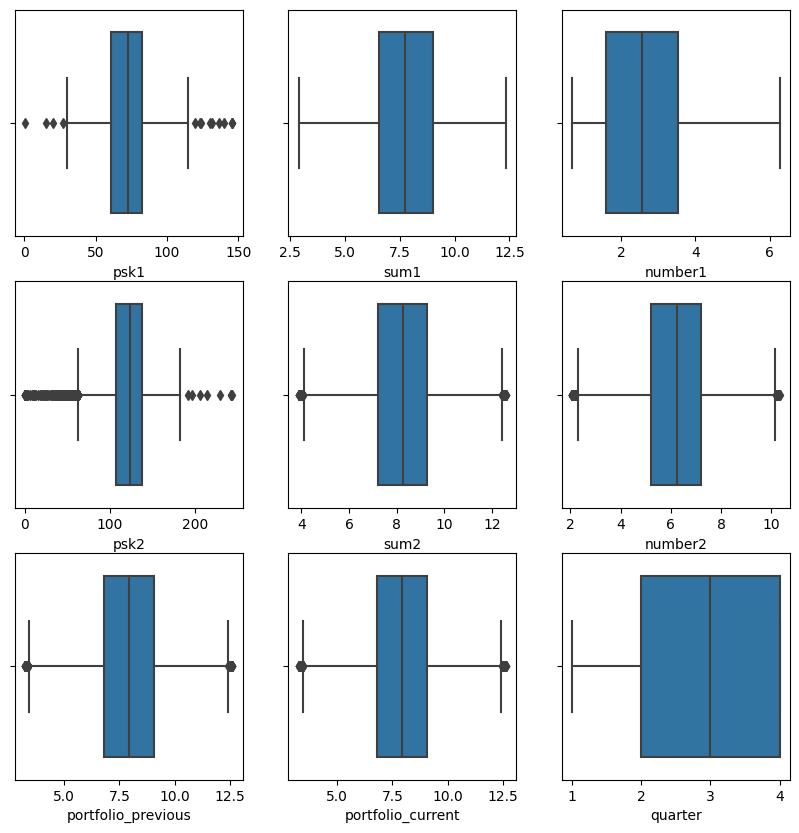

In [ ]:
columns = df.columns.tolist()
columns.pop(9)
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, column in enumerate(columns):
    x_series=df[df[column]!=0][column]
    sns.boxplot(x=x_series, ax=axes[i//3][i%3])

# **СТРОИМ МОДЕЛЬ ЛИНЕЙНОЙ РЕГРЕССИИ**

>>## **Обязательная часть**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()

In [ ]:
features = df.drop(['portfolio_current'], axis=1)
targets = df['portfolio_current']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.25, random_state=0)

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.score(x_train, y_train)

0.6113490880184003

In [ ]:
model.score(x_test, y_test)

0.6404281389682156

**Анализ результатов**

In [ ]:
columns = x_test.columns.tolist()
coefficients = model.coef_
coefficient_labels = {label: coefficient for label, coefficient in zip(columns, coefficients)}
pd.DataFrame.from_dict(coefficient_labels, orient='index', columns=['Coefficient'])


,Coefficient
psk1,5.236654
sum1,0.484319
number1,-16.943509
psk2,1.768857
sum2,0.314376
number2,0.127638
portfolio_previous,0.459169
quarter,-159.697059
yaear,-402.011212


>>## **Если был логарифм используем exp**

In [ ]:
compared_results = pd.DataFrame({"true_value": y_test, "predicted_value": y_pred})

In [ ]:
compared_results[['true_value', 'predicted_value']] = np.exp(compared_results[['true_value', 'predicted_value']])

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


In [ ]:
compared_results['diference'] = np.abs(compared_results['true_value'] - compared_results['predicted_value'])

In [ ]:
compared_results.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,true_value,predicted_value,diference
count,6.038000e+03,6.038000e+03,393.0
mean,inf,inf,inf
std,NaN,NaN,NaN
min,1.000000e+00,1.351320e-188,1.0
25%,1.116305e+57,3.678737e+282,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,inf,inf,inf


In [ ]:
mse = mean_squared_error(compared_results['true_value'], compared_results['predicted_value'])
math.sqrt(mse)

ValueError: Input contains NaN.

In [ ]:
compared_results

# **СТРОИМ НЕЙРОННУЮ СЕТЬ**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.model_selection import train_test_split

tf.random.set_seed(0)
model = Sequential()

In [ ]:
features = df.drop(['portfolio_current'], axis=1)
targets = df['portfolio_current']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=0)

In [ ]:
'''
mean = np.mean(x_train[x_train!=0], axis=0)
std = np.std(x_train[x_train!=0], axis=0)
'''
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

mean , '==================' , std

(psk1                     2.562102
 sum1                   108.690683
 number1                  0.454193
 psk2                    92.412658
 sum2                  3306.843551
 number2                426.210197
 portfolio_previous    2703.696253
 quarter                  2.562422
 yaear                 2020.038251
 dtype: float64,
 '==================',
 psk1                    13.645605
 sum1                   948.047288
 number1                  3.677737
 psk2                    54.695978
 sum2                  4599.067395
 number2                565.429092
 portfolio_previous    3798.367918
 quarter                  1.056301
 yaear                    0.783193
 dtype: float64)

In [ ]:
'''
x_train[x_train!=0] -= mean
x_test[x_test!=0] -= mean
x_train[x_train!=0] /= std
x_test[x_test!=0] /= std
x_train[x_train!=0].std() , '==========', x_test[x_test!=0].std()
'''
x_train -= mean
x_test -= mean
x_train /= std
x_test /= std
x_train.std() , '==========', x_test.std()


(psk1                  1.000026
 sum1                  1.000026
 number1               1.000026
 psk2                  1.000026
 sum2                  1.000026
 number2               1.000026
 portfolio_previous    1.000026
 quarter               1.000026
 yaear                 1.000026
 dtype: float64,
 '==========',
 psk1                  1.005246
 sum1                  0.972166
 number1               0.945628
 psk2                  1.005777
 sum2                  1.020089
 number2               1.016803
 portfolio_previous    1.029973
 quarter               1.009637
 yaear                 0.995402
 dtype: float64)

In [ ]:
model.add(Dense(64, activation='relu', input_shape = (x_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3061 (11.96 KB)
Trainable params: 3061 (11.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=15,
    validation_data=(x_test, y_test)
)

Epoch 1/15
302/302 [==============================] - 3s 3ms/step - loss: 19165960.0000 - mae: 2457.9053 - val_loss: 8957554.0000 - val_mae: 1536.5939
Epoch 2/15
302/302 [==============================] - 1s 3ms/step - loss: 6725358.5000 - mae: 1405.7188 - val_loss: 5991921.5000 - val_mae: 1386.1356
Epoch 3/15
302/302 [==============================] - 1s 4ms/step - loss: 6117140.5000 - mae: 1376.3611 - val_loss: 5720006.0000 - val_mae: 1357.2245
Epoch 4/15
302/302 [==============================] - 1s 3ms/step - loss: 5897793.5000 - mae: 1346.6676 - val_loss: 5547526.0000 - val_mae: 1323.3329
Epoch 5/15
302/302 [==============================] - 1s 3ms/step - loss: 5744301.0000 - mae: 1318.6331 - val_loss: 5415306.5000 - val_mae: 1289.2817
Epoch 6/15
302/302 [==============================] - 1s 2ms/step - loss: 5608296.0000 - mae: 1285.4982 - val_loss: 5283769.0000 - val_mae: 1271.6195
Epoch 7/15
302/302 [==============================] - 1s 2ms/step - loss: 5452209.5000 - mae: 1262.

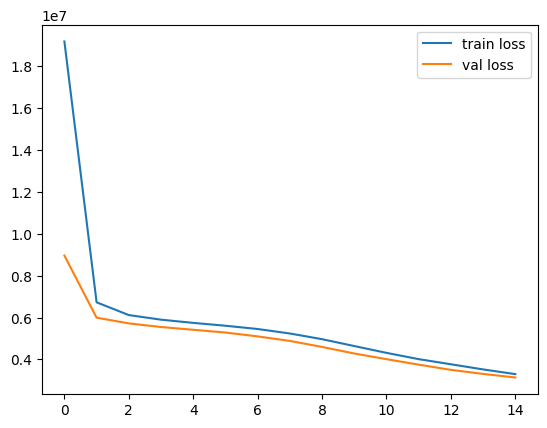

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend();

# **СТРОИМ XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
features = df.drop(['portfolio_current'], axis=1)
targets = df['portfolio_current']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=0)

In [ ]:
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# **Bagging**

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = BaggingRegressor(DecisionTreeRegressor(random_state=10),
                           n_estimators=150,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=10
                           )

In [ ]:
from sklearn.model_selection import train_test_split
features = df.drop(['portfolio_current'], axis=1)
targets = df['portfolio_current']
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=0)

In [ ]:
model.fit(x_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=10),
                 max_features=0.5, max_samples=0.5, n_estimators=150,
                 random_state=10)

In [ ]:
model.score(x_train, y_train)

0.8724592070856589

In [ ]:
model.score(x_test, y_test)

0.7261924061626233

# **RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Создаем модель RandomForest
model = RandomForestRegressor(
    oob_score=True,
    max_depth=20,
    # min_samples_leaf=1,
    random_state=10,
    max_features=0.33
)

In [ ]:
from sklearn.model_selection import train_test_split
features = df.drop(['portfolio_current'], axis=1)
targets = df['portfolio_current']
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=0)

In [ ]:
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features=0.33, oob_score=True,
                      random_state=10)

In [ ]:
model.score(x_train, y_train)

0.9503226951661917

In [ ]:
model.score(x_test, y_test)

0.724085829978373

In [ ]:
imp = pd.Series(model.feature_importances_)
imp.index = pd.Series(x_train.columns)
imp

psk1                  0.003857
sum1                  0.003634
number1               0.006923
psk2                  0.042460
sum2                  0.330459
number2               0.304355
portfolio_previous    0.256184
quarter               0.030623
yaear                 0.021505
dtype: float64

# **METRICS**

In [25]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred = model.predict(x_test)

In [111]:
y_test = df['portfolio_current']
y_pred = df['portfolio_previous']
compared_results = pd.DataFrame({"true_value": y_test, "predicted_value": y_pred})
compared_results['diference'] = np.abs(compared_results['true_value'] - compared_results['predicted_value'])

In [112]:
mse = mean_squared_error(y_test, y_pred)
math.sqrt(mse)

2849.026477605624

In [28]:
y_pred = pd.Series(y_pred.flatten())
compared_results = pd.DataFrame({"true_value": y_test, "predicted_value": y_pred})
compared_results['diference'] = np.abs(compared_results['true_value'] - compared_results['predicted_value'])

AttributeError: 'Series' object has no attribute 'flatten'

In [113]:
compared_results.describe()

,true_value,predicted_value,diference
count,24151.000000,24151.000000,24151.000000
mean,2732.149741,2707.997541,1115.128492
std,3867.701083,3821.418317,2621.778963
min,0.000000,0.000000,0.000000
25%,150.000000,164.500000,20.000000
50%,1157.000000,1157.000000,174.000000
75%,3678.000000,3638.000000,702.500000
max,21645.000000,20939.000000,20939.000000
